# Sesi 13
# Clasification 2

- Naive Bayes
- Decision Tree
- Random Forest
- Support Vector Machine

## Naive Bayes

In [4]:
# Naive Bayes with Multiple label

In [5]:
from sklearn import datasets

wine = datasets.load_wine()

In [7]:
#split data to data training and testing
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(wine.data, 
                                                    wine.target, 
                                                    test_size=0.3, 
                                                    random_state=13)

In [9]:
from sklearn.naive_bayes import GaussianNB

In [11]:
gnb = GaussianNB()

gnb.fit(x_train, y_train)

GaussianNB()

In [12]:
y_pred = gnb.predict(x_test)

In [13]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.9814814814814815

In [16]:
gnb.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1]])

array([1])

In [17]:
# untuk menyesuaikan dengan kemampuan komputer (digunakan jika komputer/resource tidak mampu mengakses data yang besar)
gnb.partial_fit(x_train, y_train)

GaussianNB()

## Descission Tree

In [19]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [21]:
print(col_names)

['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']


In [22]:
pima = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv', header=None, names=col_names)

In [23]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [24]:
pima.drop(0, inplace=True)

In [25]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [26]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  768 non-null    object
 1   glucose   768 non-null    object
 2   bp        768 non-null    object
 3   skin      768 non-null    object
 4   insulin   768 non-null    object
 5   bmi       768 non-null    object
 6   pedigree  768 non-null    object
 7   age       768 non-null    object
 8   label     768 non-null    object
dtypes: object(9)
memory usage: 60.0+ KB


In [27]:
# ganti kolom ke numerik
# error coerce kalo ada yang tidak bisa diganti maka diubah ke nan

for col in col_names:
    pima[col] = pd.to_numeric(pima[col], errors='coerce')

In [28]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [29]:
# tentukan data x dan y
pima.head(2)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0


In [33]:
feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']

In [34]:
x = pima[feature_cols]
y = pima.label

In [35]:
x.head(2)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
1,6,148,72,35,0,33.6,0.627,50
2,1,85,66,29,0,26.6,0.351,31


In [36]:
y[0:3]

1    1
2    0
3    1
Name: label, dtype: int64

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=13)

In [38]:
# predict using decision tree
clf = DecisionTreeClassifier()

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [39]:
accuracy_score(y_test, y_pred)

0.696969696969697

[Text(143.07769396551726, 209.6742857142857, 'X[1] <= 123.5\ngini = 0.447\nsamples = 537\nvalue = [356, 181]'),
 Text(40.286637931034484, 194.14285714285714, 'X[7] <= 28.5\ngini = 0.282\nsamples = 324\nvalue = [269, 55]'),
 Text(25.013793103448275, 178.61142857142858, 'X[5] <= 45.4\ngini = 0.135\nsamples = 192\nvalue = [178, 14]'),
 Text(21.165517241379312, 163.07999999999998, 'X[5] <= 30.95\ngini = 0.11\nsamples = 189\nvalue = [178, 11]'),
 Text(13.46896551724138, 147.54857142857142, 'X[6] <= 0.672\ngini = 0.018\nsamples = 112\nvalue = [111, 1]'),
 Text(9.620689655172415, 132.01714285714286, 'gini = 0.0\nsamples = 100\nvalue = [100, 0]'),
 Text(17.317241379310346, 132.01714285714286, 'X[0] <= 2.5\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(13.46896551724138, 116.48571428571428, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(21.165517241379312, 116.48571428571428, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(28.862068965517242, 147.54857142857142, 'X[5] <= 31.3\ngin

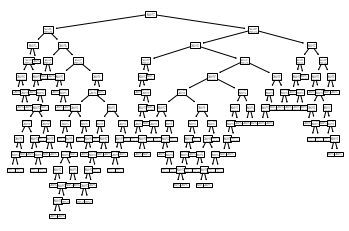

In [41]:
from sklearn import tree

tree.plot_tree(clf)

In [43]:
!conda install python-graphviz -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\icode9\anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    python-graphviz-0.16       |     pyhd3eb1b0_1          20 KB
    ------------------------------------------------------------
                                           Total:        29.3 MB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2
  python-graphviz    pkgs/main/noarch::python-graphviz-0.16-pyhd3eb1b0_1




python-graphviz-0.16 | 20 KB     |            |   0% 
python-graphviz-0.16 | 20 KB     | #######8   |  78% 
python-graphviz-0.16 | 20 KB     | ########## | 100% 
python-graphviz-0.16 | 20 KB     | ########## | 100% 

graphviz-2.38        | 29.3 M

In [47]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=9a5ef809589bbb8342c7ce06b62c6dd8c383563012a76fe264f987eb10b5ca5f
  Stored in directory: c:\users\icode9\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [ ]:
import pydotplus
from sklearn.external.six import String IO
from IPython.display

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graph

In [44]:
clf = DecisionTreeClassifier(criterion='entropy',
                            max_depth=3)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [45]:
accuracy_score(y_test, y_pred)

0.7142857142857143

## Random Forest

In [48]:
iris = datasets.load_iris()

In [49]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [50]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [51]:
iris.target[0:5]

array([0, 0, 0, 0, 0])

In [52]:
data = pd.DataFrame({
    'sepal length': iris.data[:, 0],
    'sepal width': iris.data[:, 1],
    'petal length': iris.data[:, 2],
    'petal width': iris.data[:, 3],
    'species': iris.target
})

data.head(3)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [55]:
x = data.drop(columns='species')
y = data.species

In [56]:
x.head(2)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [57]:
y[0:2]

0    0
1    0
Name: species, dtype: int32

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.3)

In [59]:
x_train.shape

(105, 4)

In [60]:
x_test.shape

(45, 4)

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
clf = RandomForestClassifier(n_estimators=100)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [63]:
accuracy_score(y_test, y_pred)

0.9777777777777777

In [64]:
clf.predict([[3, 5, 4, 2]])

array([1])

In [66]:
clf.feature_importances_

array([0.08037785, 0.01952948, 0.44405839, 0.45603429])

In [65]:
import seaborn as sns

In [67]:
feature_imp = pd.Series(clf.feature_importances_,
                       index = iris.feature_names).sort_values(ascending=False)

<AxesSubplot:>

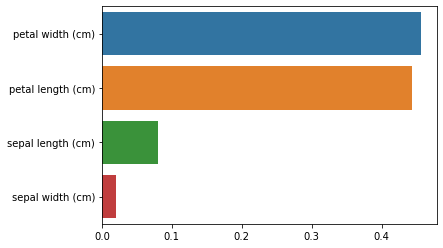

In [68]:
sns.barplot(x=feature_imp, y=feature_imp.index)

In [69]:
data.head(2)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [70]:
x = data.drop(columns=['sepal width', 'species'])
x.head(2)

,sepal length,petal length,petal width
0,5.1,1.4,0.2
1,4.9,1.4,0.2


In [72]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.3,
                                                   random_state=13)

In [73]:
clf = RandomForestClassifier(n_estimators=100)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.9555555555555556

## SVM

In [74]:
cancer = datasets.load_breast_cancer()

In [75]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [76]:
cancer.data[0:2]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02]])

In [77]:
cancer.target[0:2]

array([0, 0])

In [79]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    test_size=0.3, 
                                                    random_state=13)

In [81]:
# create the model
from sklearn.svm import SVC

In [83]:
clf = SVC(kernel='linear')

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [84]:
accuracy_score(y_test, y_pred)

0.9590643274853801

## Exercise

In [86]:
import pandas as pd
import numpy as np

In [87]:
data = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Final_Dataset/train.csv')

In [88]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [89]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

ada beberapa data numerik null

In [90]:
# isi data null dengan mean
data.fillna(data.mean(), inplace=True)

In [91]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

tersisa data non numerik yg masih terdapat null

In [94]:
data.Gender.fillna(data.Gender.mode()[0], inplace=True)

In [100]:
data.Married.fillna(data.Married.mode()[0], inplace=True)
data.Dependents.fillna(data.Dependents.mode()[0], inplace=True)
data.Self_Employed.fillna(data.Self_Employed.mode()[0], inplace=True)

In [97]:
data.shape

(614, 13)

In [101]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

data clear from missing value

In [104]:
data.Loan_Amount_Term = np.log(data.Loan_Amount_Term)

In [105]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,5.886104,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,5.886104,1.0,Rural,N


In [113]:
x = data.drop('Loan_Status', 1)
y = data.Loan_Status

In [106]:
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [107]:
data.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [114]:
x = pd.get_dummies(x)
x.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,5.886104,1.0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,5.886104,1.0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [108]:
y[0:2]

0    0
1    0
Name: species, dtype: int32

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=13)

In [119]:
# LR 
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)
pred_LR = modelLR.predict(x_test)

acc_LR = accuracy_score(y_test, pred_LR)

C:\Users\icode9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [117]:
# DT
from sklearn.linear_model import DecisionTreeClassifier

modelDT = DecisionTreeClassifier()
modelDT.fit(x_train, y_train)
pred_DT = modelDT.predict(x_test)

acc_DT = accuracy_score(y_test, pred_DT)

ImportError: cannot import name 'DecisionTreeClassifier' from 'sklearn.linear_model' (C:\Users\icode9\anaconda3\lib\site-packages\sklearn\linear_model\__init__.py)

In [ ]:
# RF
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier()
modelRF.fit(x_train, y_train)
pred_RF = modelDT.predict(x_test)

acc_DT = accuracy_score(y_test, pred_DT)

In [ ]:
print('RF:', acc_RF)
print('DT:', acc_DT)
print('LR:', acc_LR)

In [ ]:
pd.DataFrame({
    'id': x_test.index,
    'prediction': pred_LR
}).to_csv('H8_Credit_Prediction.csv')

In [ ]:
pd.read_csv('H8_Credit_Prediction.csv')